In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# generate two class dataset
data = pd.read_csv("stroke 21 variables for ML.csv")
data.head()

,stroke,NP,NC,MP,MC,BasoP,BasoC,EosP,EosC,MPV,...,RBC,RDW-DV,MCV,Glc,PLT,PDW,PCT,Hgb,Sex,Age
0,1,85.40,7.95,4.7,0.44,0.2,2,1.2,0.11,10.0,...,2.71,15.0,81.5,11.91,177,16.2,0.177,73,0,64
1,1,66.60,5.10,5.4,0.41,0.2,2,0.8,0.06,8.7,...,4.98,12.7,89.4,6.93,241,16.0,0.210,153,1,47
2,1,61.70,4.72,6.6,0.51,0.2,2,4.4,0.34,8.4,...,4.62,12.5,92.0,9.43,227,15.0,0.192,139,1,44
3,1,83.34,10.69,2.9,0.37,0.2,2,0.2,0.02,9.3,...,5.06,12.4,88.5,7.98,296,11.3,0.270,138,0,60
4,1,58.50,3.93,5.3,0.36,0.3,2,0.4,0.03,8.7,...,3.70,12.8,91.0,5.67,193,15.3,0.168,107,0,65


In [2]:
# Split target and features
X = data.drop(['stroke'],axis=1)
X
y = data['stroke']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(10476, 23)
(10476,)


In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

# second one

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=5)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)

(8380, 23)
(2096, 23)
(8380,)
(2096,)


In [5]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# logistic regression
model1 = LogisticRegression(C=1.01)
# knn
model2 = KNeighborsClassifier(n_neighbors=51)
# RF
model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=186,)
# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=7, min_child_weight=3)
# # elastic net
# model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)   #因为EN-model 的evaluation metrics不显示，所以注掉先

# neural network
model6 = MLPClassifier(alpha=0.1, hidden_layer_sizes=13)

# GaussianNB
model7=GaussianNB() # by default


# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
# model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
# pred_prob5 = model5.predict(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)

C:\Users\93513\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[17:59:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\93513\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from matplotlib import cm

In [10]:
# 1 - logistic regression
results1 = permutation_importance(model1, X, y, scoring='accuracy')
# get importance
importance1 = results1.importances_mean

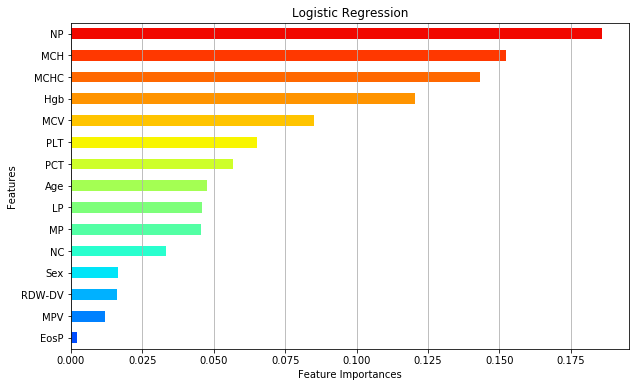

In [11]:
# logistic regression
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances1=pd.Series(importance1,X_features.columns)
ax1=feat_importances1.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),left=0,color=colors)
ax1.set_ylabel('Features')
ax1.set_xlabel('Feature Importances')
ax1.set_title('Logistic Regression')
ax1.invert_yaxis()
ax1.grid(axis='x')

In [12]:
# 2 - kNN
results2 = permutation_importance(model2, X, y, scoring='accuracy')
# get importance
importance2 = results2.importances_mean

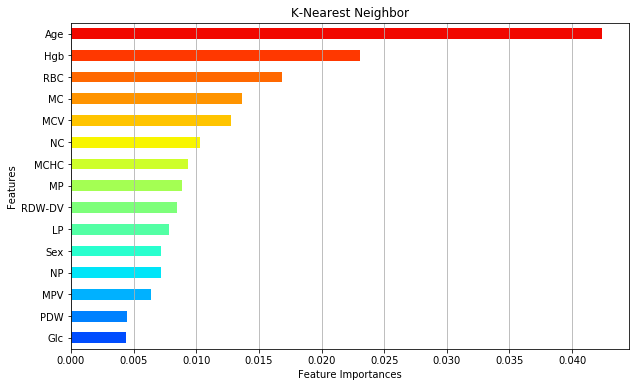

In [13]:
# kNN
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances2=pd.Series(abs(importance2),index=X_features.columns)
ax2=feat_importances2.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax2.set_ylabel('Features')
ax2.set_xlabel('Feature Importances')
ax2.set_title('K-Nearest Neighbor')
ax2.invert_yaxis()
ax2.grid(axis='x')

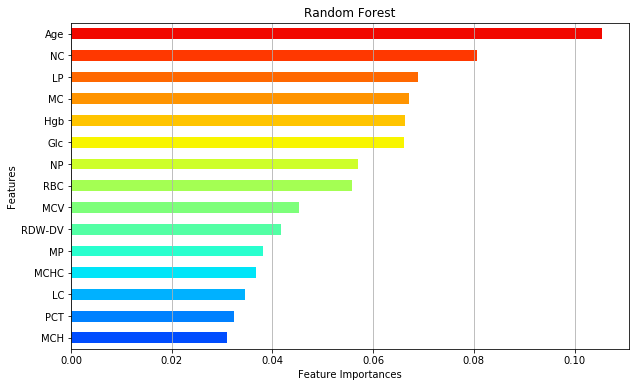

In [14]:
# 3 - RF

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances3=pd.Series(model3.feature_importances_,index=X_features.columns)
ax3=feat_importances3.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax3.set_ylabel('Features')
ax3.set_xlabel('Feature Importances')
ax3.set_title('Random Forest')
ax3.invert_yaxis()
ax3.grid(axis='x')

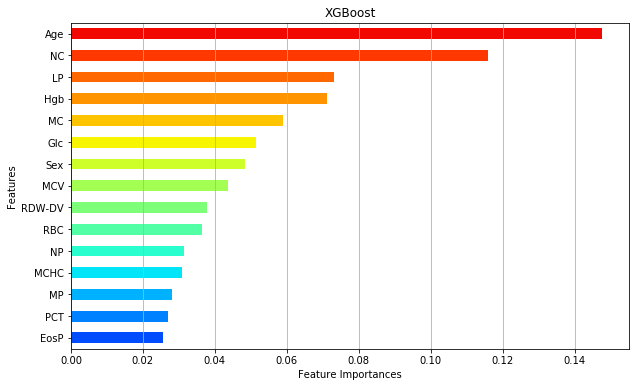

In [15]:
# 4 - XGBoost

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances4=pd.Series(model4.feature_importances_,index=X_features.columns)
ax4=feat_importances4.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax4.set_ylabel('Features')
ax4.set_xlabel('Feature Importances')
ax4.set_title('XGBoost')
ax4.invert_yaxis()
ax4.grid(axis='x')

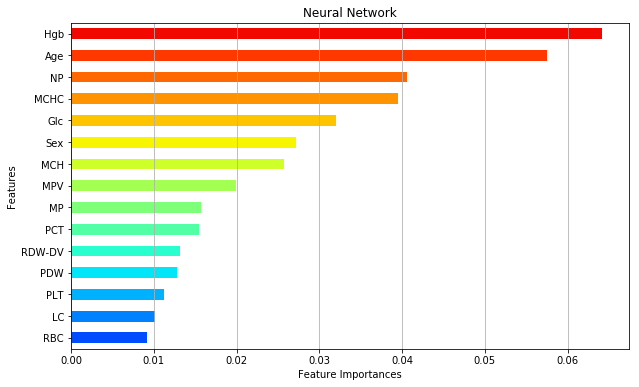

In [16]:
# 6 - NN
results6 = permutation_importance(model6, X, y, scoring='accuracy')
# get importance
importance6 = results6.importances_mean
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
# logistic regression
feat_importances6 = pd.Series(importance6,index=X_features.columns)
ax6=feat_importances6.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax6.set_ylabel('Features')
ax6.set_xlabel('Feature Importances')
ax6.set_title('Neural Network')
ax6.invert_yaxis()
ax6.grid(axis='x')

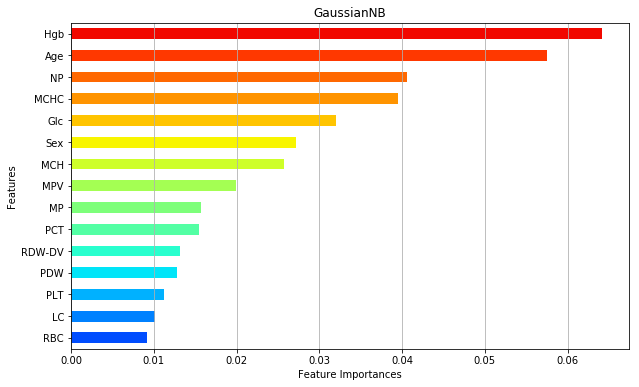

In [17]:
# 7 - GaussianNB

results7 = permutation_importance(model7, X, y, scoring='accuracy')

# get importance
importance7 = results6.importances_mean
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
# logistic regression
feat_importances7 = pd.Series(importance7,index=X_features.columns)
ax7=feat_importances6.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax7.set_ylabel('Features')
ax7.set_xlabel('Feature Importances')
ax7.set_title('GaussianNB')
ax7.invert_yaxis()
ax7.grid(axis='x')

In [ ]:
# #############################
######
##############################

In [43]:
# from sklearn.metrics import roc_auc_score
# model8=GaussianNB(priors=None) #var_smoothing=1e-8
# model8.fit(X_train, y_train)
# pred_prob8 = model8.predict_proba(X_test)
# pred8 = model8.predict(X_test)
# #pred_prob8
# auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])
# auc_score8

0.8382136674852915

In [39]:
# from sklearn.metrics import roc_auc_score
# # model8=GaussianNB()
# # model8.fit(X_train, y_train)
# # pred_prob8 = model8.predict_proba(X_test)
# # pred8 = model8.predict(X_test)
# # #pred_prob8

# # auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])
# # auc_score8
# from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
# recall8 = recall_score(y_test,pred8)
# print(recall8)
# f18 = f1_score(y_test, pred8)
# print(f18)


0.6509161041465766
0.7192328183271178


In [7]:
## feature importances

from sklearn.inspection import permutation_importance
from matplotlib import cm

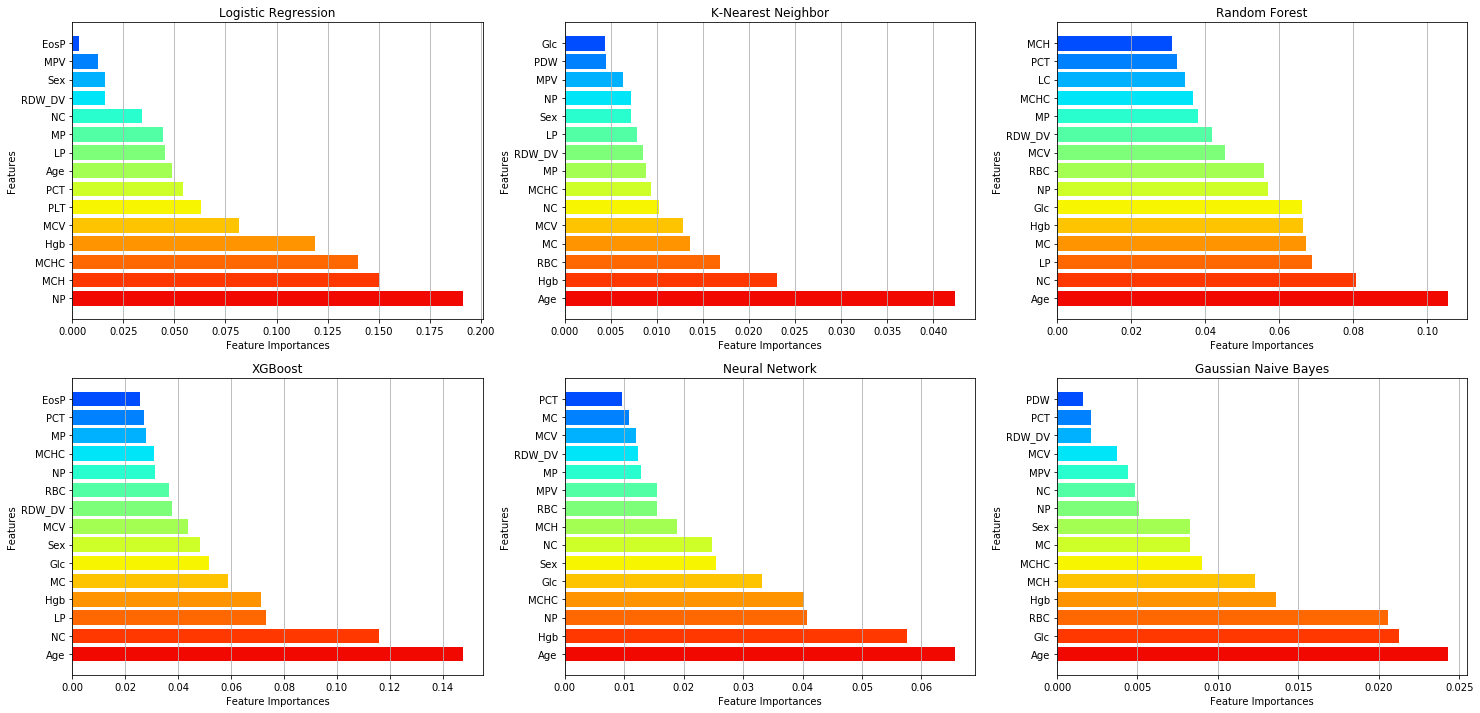

In [20]:
fig,subs=plt.subplots(2,3,figsize=(25, 12))
# 1 - logistic regression
results1 = permutation_importance(model1, X, y, scoring='accuracy')
# get importance
importance1 = results1.importances_mean

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

plt.subplot(231)
label1 = ['NP','MCH','MCHC','Hgb','MCV','PLT','PCT','Age','LP','MP','NC','RDW_DV','Sex','MPV','EosP']
plt.barh(label1
        ,sorted(abs(importance1),reverse=True)[:15],color=colors)
plt.ylabel('Features')
plt.xlabel('Feature Importances')
plt.title('Logistic Regression')
plt.grid(axis='x')

# 2 - knn

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

plt.subplot(232)
label2 = ['Age','Hgb','RBC','MC','MCV','NC','MCHC','MP','RDW_DV','LP','Sex','NP','MPV','PDW','Glc']
plt.barh(label2
        ,sorted(abs(importance2),reverse=True)[:15],color=colors)
plt.ylabel('Features')
plt.xlabel('Feature Importances')
plt.title('K-Nearest Neighbor')
plt.grid(axis='x')


# 3 - RF

colors = cm.jet([0.9,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20])
plt.subplot(233)
label3 = ['Age','NC','LP','MC','Hgb','Glc','NP','RBC','MCV','RDW_DV','MP','MCHC','LC','PCT','MCH']
plt.barh(label3
        ,sorted(abs(model3.feature_importances_),reverse=True)[:15],color=colors)
plt.ylabel('Features')
plt.xlabel('Feature Importances')
plt.title('Random Forest')
plt.grid(axis='x')

# 4 -XGBoost

colors = cm.jet([0.9,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20])
plt.subplot(234)
label4 = ['Age','NC','LP','Hgb','MC','Glc','Sex','MCV','RDW_DV','RBC','NP','MCHC','MP','PCT','EosP']
plt.barh(label4
        ,sorted(abs(model4.feature_importances_),reverse=True)[:15],color=colors)
plt.ylabel('Features')
plt.xlabel('Feature Importances')
plt.title('XGBoost')
plt.grid(axis='x')

# # 5 - EN
# colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

# plt.subplot(235)
# label1 = ['MCH','MCHC','MCV','Hgb','NP','PCT','PLT','Age','MP','LC','RDW_DV','MPV','Sex','NC','RBC']
# plt.barh(label1
#         ,sorted(abs(model5.coef_),reverse=True)[:15],color=colors)
# plt.ylabel('Features')
# plt.xlabel('Feature Importances')
# plt.title('Elastic Net')
# plt.grid(axis='x')
# #np.abs(model5.coef_)



# 6 - NN

results6 = permutation_importance(model6, X, y, scoring='accuracy')
# get importance
importance6 = results6.importances_mean

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

plt.subplot(235)
label6 = ['Age','Hgb','NP','MCHC','Glc','Sex','NC','MCH','RBC','MPV','MP','RDW_DV','MCV','MC','PCT']
plt.barh(label6
        ,sorted(abs(importance6),reverse=True)[:15],color=colors)
plt.ylabel('Features')
plt.xlabel('Feature Importances')
plt.title('Neural Network')
plt.grid(axis='x')


# 7 - GaussianNB
results7 = permutation_importance(model7, X, y, scoring='accuracy')
# get importance
importance7 = results7.importances_mean

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

plt.subplot(236)
label7 = ['Age','Glc','RBC','Hgb','MCH','MCHC','MC','Sex','NP','NC','MPV','MCV','RDW_DV','PCT','PDW']
plt.barh(label7
        ,sorted(abs(importance7),reverse=True)[:15],color=colors)
plt.ylabel('Features')
plt.xlabel('Feature Importances')
plt.title('Gaussian Naive Bayes')
plt.grid(axis='x')


In [302]:

## 尝试代码

ranks=sorted( [(x,i) for (i,x) in enumerate (model3.feature_importances_)],reverse=True)
values = []
posns = []
for x,i in ranks:
    if x not in values:
        values.append(x)
        posns.append(i)
        if len(values) == 15:
            break
print (values)
print(posns)

# #X_features.columns

# index=-1
# for j in range (len(X_features.columns)):
#     if X_features.columns[j].index == 'Age':
#         index = j
#         break
        
        
# X_features.columns   

label1 = ['Age','NC','LP','MC','Hgb','Glc','NP','RBC','MCV','RDWDV','MP','MCHC','LP','PDW','MCH']

[0.10551721894693175, 0.0807128519715676, 0.06889044698458052, 0.06711572455231915, 0.06639101768383651, 0.06620270778336362, 0.05694828750136775, 0.055857280688423196, 0.045324772683697105, 0.0417371911931274, 0.03814090235493643, 0.03679767727870191, 0.03449203962735683, 0.032388405713281575, 0.031053728408609642]
[22, 1, 11, 3, 20, 16, 0, 13, 15, 14, 2, 9, 12, 19, 10]


Index(['NP', 'NC', 'MP', 'MC', 'BasoP', 'BasoC', 'EosP', 'EosC', 'MPV', 'MCHC',
       'MCH', 'LP', 'LC', 'RBC', 'RDW-DV', 'MCV', 'Glc', 'PLT', 'PDW', 'PCT',
       'Hgb', 'Sex', 'Age'],
      dtype='object')

In [235]:
                      
# 1 - logistic regression
results1 = permutation_importance(model1, X, y, scoring='accuracy')
# get importance
importance1 = results1.importances_mean

In [ ]:
##############################################
##
##############################################

In [9]:
# 1 - logistic regression
results1 = permutation_importance(model1, X, y, scoring='accuracy')
# get importance
importance1 = results1.importances_mean

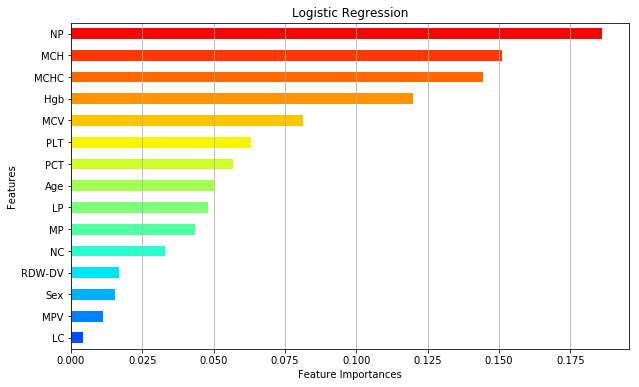

In [10]:
# logistic regression
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances1=pd.Series(importance1,X_features.columns)
ax1=feat_importances1.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),left=0,color=colors)
ax1.set_ylabel('Features')
ax1.set_xlabel('Feature Importances')
ax1.set_title('Logistic Regression')
ax1.invert_yaxis()
ax1.grid(axis='x')

In [12]:
# 2 - kNN
results2 = permutation_importance(model2, X, y, scoring='accuracy')
# get importance
importance2 = results2.importances_mean

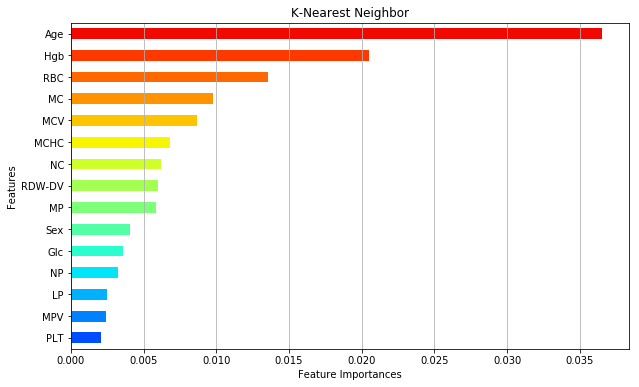

In [13]:
# kNN
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances2=pd.Series(abs(importance2),index=X_features.columns)
ax2=feat_importances2.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax2.set_ylabel('Features')
ax2.set_xlabel('Feature Importances')
ax2.set_title('K-Nearest Neighbor')
ax2.invert_yaxis()
ax2.grid(axis='x')

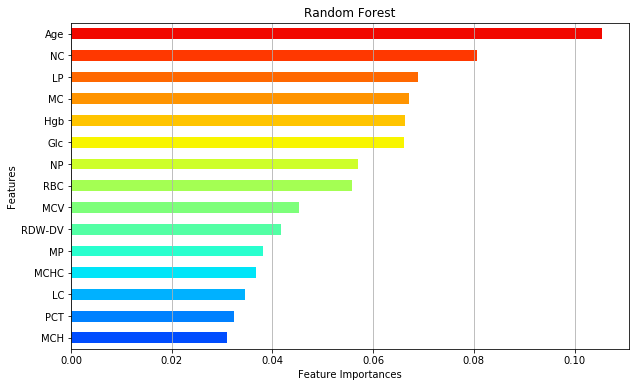

In [14]:
# 3 - RF

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances3=pd.Series(model3.feature_importances_,index=X_features.columns)
ax3=feat_importances3.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax3.set_ylabel('Features')
ax3.set_xlabel('Feature Importances')
ax3.set_title('Random Forest')
ax3.invert_yaxis()
ax3.grid(axis='x')

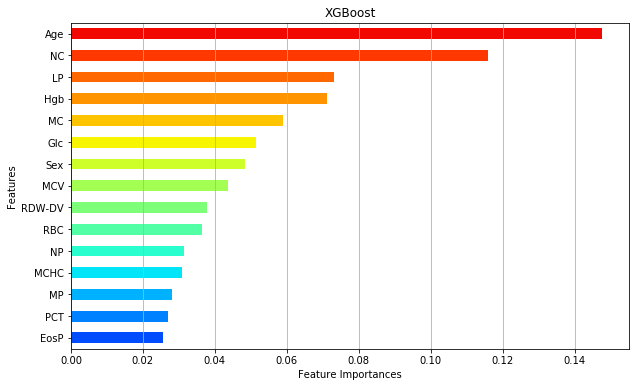

In [15]:
# 4 - XGBoost

colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
feat_importances4=pd.Series(model4.feature_importances_,index=X_features.columns)
ax4=feat_importances4.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax4.set_ylabel('Features')
ax4.set_xlabel('Feature Importances')
ax4.set_title('XGBoost')
ax4.invert_yaxis()
ax4.grid(axis='x')

In [16]:
# # 5 - EL

# colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
# feat_importances5=pd.Series(np.abs(model5.coef_),index=X_features.columns)
# ax5=feat_importances5.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
# ax5.set_ylabel('Features')
# ax5.set_xlabel('Feature Importances')
# ax5.set_title('Elastic Net')
# ax5.invert_yaxis()
# ax5.grid(axis='x')
# plt.xlim([0, 0.32])

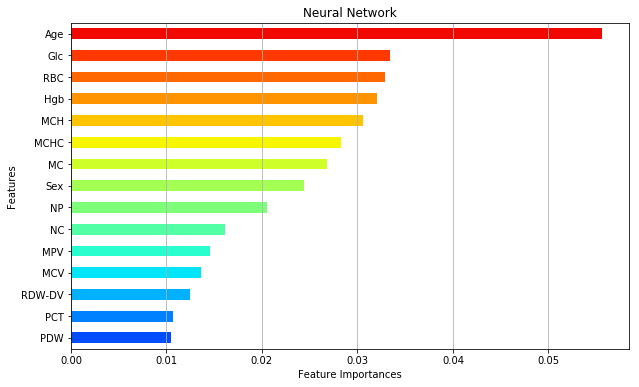

In [17]:
# 6 - NN
results6 = permutation_importance(model6, X, y, scoring='accuracy')
# get importance
importance6 = results6.importances_mean
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
# logistic regression
feat_importances6 = pd.Series(importance6,index=X_features.columns)
ax6=feat_importances6.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax6.set_ylabel('Features')
ax6.set_xlabel('Feature Importances')
ax6.set_title('Neural Network')
ax6.invert_yaxis()
ax6.grid(axis='x')

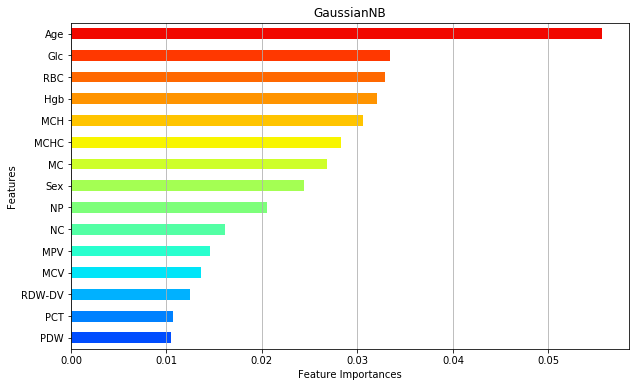

In [42]:
# 7 - GaussianNB

results7 = permutation_importance(model7, X, y, scoring='accuracy')

# get importance
importance7 = results6.importances_mean
colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])
# logistic regression
feat_importances7 = pd.Series(importance7,index=X_features.columns)
ax7=feat_importances6.nlargest(15).plot(kind='barh',width=0.5,figsize=(10,6),color=colors)
ax7.set_ylabel('Features')
ax7.set_xlabel('Feature Importances')
ax7.set_title('GaussianNB')
ax7.invert_yaxis()
ax7.grid(axis='x')